In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
from sklearn.model_selection import KFold
df1 = pd.read_csv("train1.csv") 
df2 = pd.read_csv("train2.csv") 
#df3 = pd.read_csv("train3.csv") #will be used in Part D

In [3]:
#By printing a dataframe, you can view the data in csv format
print(df1)

      Unnamed: 0         0         1    2
0              0  3.545470  2.783637  0.0
1              1 -0.049965  1.401139  1.0
2              2 -0.345808  4.097528  1.0
3              3 -0.224355  3.964598  1.0
4              4 -1.511867  5.353938  1.0
...          ...       ...       ...  ...
3995        3995  0.617500  4.977189  1.0
3996        3996  2.283821  1.907379  0.0
3997        3997  3.410391  1.077821  0.0
3998        3998  3.228921  2.579027  0.0
3999        3999  1.626419  2.763415  0.0

[4000 rows x 4 columns]


In [9]:
#You can extract keys from dataframe, which you can use to extract features or labels.
print(df1.keys())
df1_x1 = df1['0']
df1_x2 = df1['1']
df1_y = df1["2"]
# print(df1_x1)
# print(df1_x2)
print(df1_y)
#To extract data as numpy array:
df1_numpy = df1.values
#You can also extract a specific feature as numpy array as well.
df1_x1_numpy = df1['1'].values

Index(['Unnamed: 0', '0', '1', '2'], dtype='object')
0       0.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3995    1.0
3996    0.0
3997    0.0
3998    0.0
3999    0.0
Name: 2, Length: 4000, dtype: float64


In [15]:
df1_data = df1.values[:,1:3]
print(df1_data)
df1_labels = df1.values[:, 3]
print(df1_labels)
c1 = df1_data[df1_labels==0]
c2 = df1_data[df1_labels==1]
print(np.cov(c1.T))
print(np.cov(c2.T))

[[ 3.54546992  2.7836371 ]
 [-0.04996543  1.40113893]
 [-0.34580826  4.09752756]
 ...
 [ 3.4103915   1.07782135]
 [ 3.22892136  2.57902719]
 [ 1.62641942  2.76341503]]
[0. 1. 1. ... 0. 0. 0.]
[[ 0.29019462  0.18890253  0.33298467 ...  0.88851424  0.24755535
  -0.43310029]
 [ 0.18890253  0.12296633  0.21675676 ...  0.5783794   0.16114645
  -0.28192715]
 [ 0.33298467  0.21675676  0.38208423 ...  1.01952827  0.28405811
  -0.49696219]
 ...
 [ 0.88851424  0.5783794   1.01952827 ...  2.72044174  0.75796186
  -1.32606101]
 [ 0.24755535  0.16114645  0.28405811 ...  0.75796186  0.21118121
  -0.36946341]
 [-0.43310029 -0.28192715 -0.49696219 ... -1.32606101 -0.36946341
   0.64637952]]
[[0.35380673 0.00907201]
 [0.00907201 1.43810939]]


In [16]:
df2_data = df2.values[:,1:3]
df2_labels = df2.values[:, 3]
c3 = df2_data[df2_labels==0]
c4 = df2_data[df2_labels==1]
print(c3.shape, c4.shape)
cov1 =np.cov(c3.T)
cov2 = np.cov(c4.T)
print(cov1)
print(cov2)
print(cov1[0,0] - cov1[1,1])
print(cov2[0,0] - cov2[1,1])
print((cov1[0,0] - cov1[1,1]) < 1e-3)
print((cov2[0,0] - cov2[1,1]) < 1e-3)
print((cov1[1,0]) < 1e-3)
print((cov2[1,0]) < 1e-3)
print((cov1[0,1]) < 1e-3)
print((cov2[0,1]) < 1e-3)

(800, 2) (800, 2)
[[0.43328013 0.09444427]
 [0.09444427 0.06674601]]
[[0.43333327 0.09428412]
 [0.09428412 0.06666807]]
0.36653411813391246
0.3666651990421965
False
False
False
False
False
False


# Add your comments as markdown cells(This is a markdown cell).

## To add a markdown cell, simply click on a cell, then click on the 'Cell' tab above, change 'Cell Type' to 'Markdown'

Then add your comment! To view the format of this markdown cell, double click on here.

### Note: We provide you with example codes for starter, but feel free to delete anything we provide and write your own code, as long as you use allowed libraries and modules. 

## Part A: Examine training sets

[3.54546992 2.7836371 ]
[[ 2.23936059 -1.40639738]
 [-1.40639738  2.07796936]]
[[1.15598756 0.56209755]
 [0.56209755 0.36935451]]


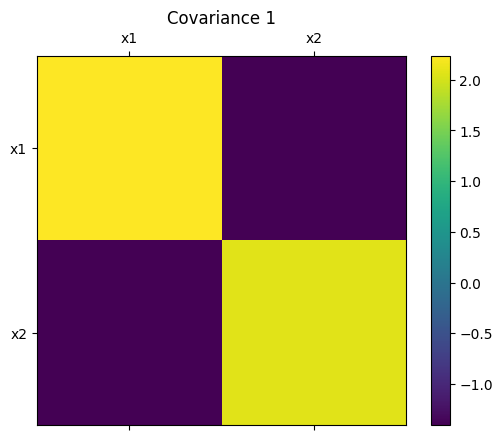

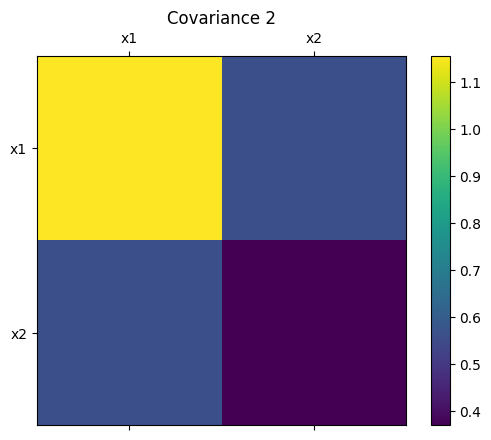

In [47]:
#PART A: Examine training sets here. plots etc.
#Hint: df1_class0 = df1[df1['column_name']==0] creates a new dataframe and includes samples (rows) whose class values are 0
#hint: for data distribution plots use plt.scatter(x-axis,y-axis,other params. check online)
#Hint: for each new plot use plt.figure() so they won't overlap, one on top of another
#-------
#to plot cov. matrices you may use following code: (compute 'cov_mtrx' by yourself)
alpha = ['x1', 'x2']
df1_data = df1.values[:,1:3] # x1,x2 values of dataset1
print(df1_data[0])
df2_data = df2.values[:,1:3] # x1,x2 values of dataset2
cov1 = np.cov(df1_data.T) # covariance matrix of the x values of data1 
cov2 = np.cov(df2_data.T) # covariance matrix of the x values of data2
print(cov1)
print(cov2)
fig = plt.figure()
ax1 = fig.add_subplot(111)
cax = ax1.matshow(cov1,interpolation='nearest') #cov. matrix of dataset1
fig.colorbar(cax)
ax1.set_xticks((0,1))
ax1.set_xticklabels(alpha)
ax1.set_yticks((0,1))
ax1.set_yticklabels(alpha)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
cax2 = ax2.matshow(cov2,interpolation='nearest') #cov. matrix of dataset2
fig2.colorbar(cax2)
ax2.set_xticks((0,1))
ax2.set_xticklabels(alpha)
ax2.set_yticks((0,1))
ax2.set_yticklabels(alpha)

ax1.title.set_text('Covariance 1')
ax2.title.set_text('Covariance 2')

#---------
#for the histogram plots use plt.hist() (Remember: 4 of them we want)
#for title use: plt.gca().set(title='Data distribution of feature x of trainingSet y', ylabel='Frequency')


### Histograms

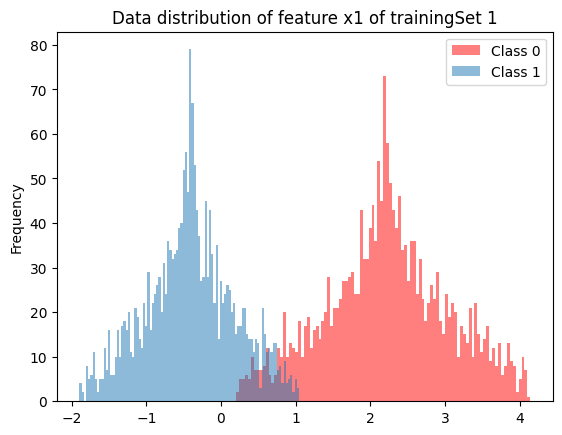

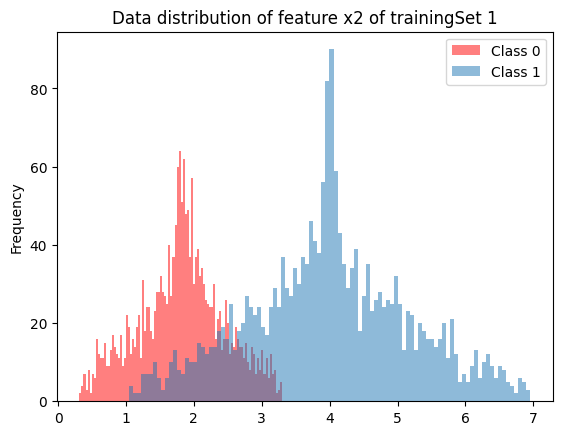

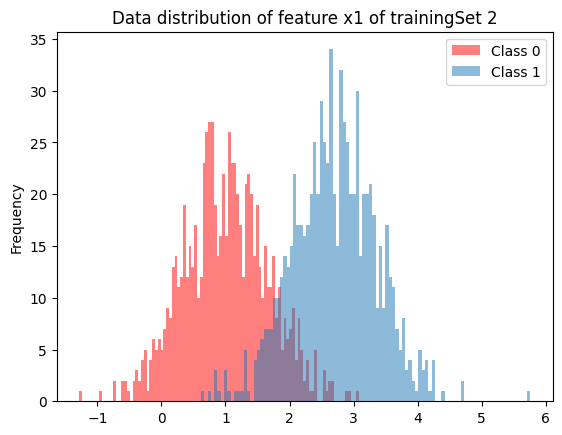

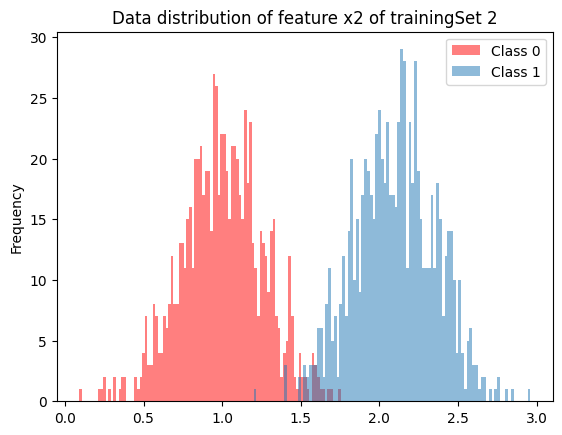

In [68]:
#dataset 1
df1_1 = df1_data[df1.values[:,3]==1] # x values for class 1
df1_0 = df1_data[df1.values[:,3]==0] # x values for class 0

#dataset 2
df2_1 = df2_data[df2.values[:,3]==1] # x values for class 1
df2_0 = df2_data[df2.values[:,3]==0] # x values for class 0


plt.hist(df1_0[:,0],bins=100,alpha=0.5,color='red')
plt.hist(df1_1[:,0],bins=100,alpha=0.5)

plt.legend(["Class 0","Class 1"])
plt.gca().set(title='Data distribution of feature x1 of trainingSet 1', ylabel='Frequency')
plt.show()

plt.hist(df1_0[:,1],bins=100,alpha=0.5,color='red')
plt.hist(df1_1[:,1],bins=100,alpha=0.5)

plt.legend(["Class 0","Class 1"])
plt.gca().set(title='Data distribution of feature x2 of trainingSet 1', ylabel='Frequency')
plt.show()

plt.hist(df2_0[:,0],bins=100,alpha=0.5,color='red')
plt.hist(df2_1[:,0],bins=100,alpha=0.5)

plt.legend(["Class 0","Class 1"])
plt.gca().set(title='Data distribution of feature x1 of trainingSet 2', ylabel='Frequency')
plt.show()

plt.hist(df2_0[:,1],bins=100,alpha=0.5,color='red')
plt.hist(df2_1[:,1],bins=100,alpha=0.5)

plt.legend(["Class 0","Class 1"])
plt.gca().set(title='Data distribution of feature x2 of trainingSet 2', ylabel='Frequency')
plt.show()

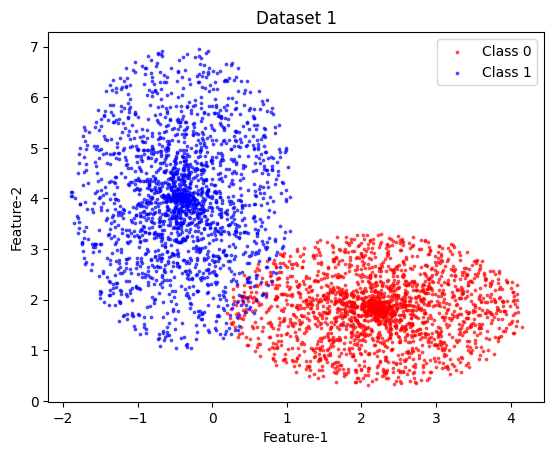

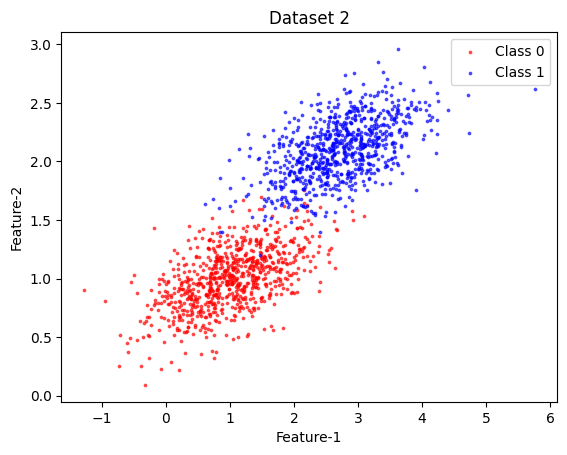

In [71]:
plt.scatter(df1_0[:,0],df1_0[:,1],s=3,c='red',alpha=0.6)
plt.scatter(df1_1[:,0],df1_1[:,1],s=3,c='blue',alpha=0.6)

plt.title("Dataset 1")
plt.legend(["Class 0","Class 1"])
plt.xlabel("Feature-1")
plt.ylabel("Feature-2")
plt.show()

plt.scatter(df2_0[:,0],df2_0[:,1],s=3,c='red',alpha=0.6)
plt.scatter(df2_1[:,0],df2_1[:,1],s=3,c='blue',alpha=0.6)

plt.title("Dataset 2")
plt.legend(["Class 0","Class 1"])
plt.xlabel("Feature-1")
plt.ylabel("Feature-2")

plt.show()

### PART B

In [79]:
#Implement PART B:
test1 = pd.read_csv("test1.csv")
test2 = pd.read_csv("test2.csv")

mean1_0 = np.mean(df1_0,axis=0)
mean1_1 = np.mean(df1_1,axis=0)
mean2_0 = np.mean(df2_0,axis=0)
mean2_1 = np.mean(df2_1,axis=0)

# print(mean1_0)
# print(mean1_1)
# print(mean2_0)
# print(mean2_1)

cov1_0 = np.cov(df1_0.T)
cov1_1 = np.cov(df1_1.T)
cov2_0 = np.cov(df2_0.T)
cov2_1 = np.cov(df2_1.T)



[2.21769596 1.81682192]
[-0.40657297  3.97311422]
[1. 1.]
[2.7 2.1]
[[0.35380673 0.00907201]
 [0.00907201 1.43810939]]
[[-0.10590037  0.56286226]
 [ 0.20356597  0.923208  ]
 [ 1.16697489  0.90127987]
 ...
 [ 0.68034894  1.25332791]
 [ 0.20742038  0.22223601]
 [ 0.317544    1.1208859 ]]


In [ ]:
#Implement PART C: